In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#defining step function that has range {-1,1} instead of {0,1}

def step(s):
    if s > 0:
        return 1
    else:
        return -1
    
    
#also defining step function that produces appropriate output from boolean

def step_bool(s):
    if s:
        return 1
    else:
        return -1

In [3]:
class perceptron:
    
    def __init__(self, input_size):
        #input size = number of predictors
        #we want to add 1 to this to include the bias
        self.input_size = input_size + 1 
        
        self.weights = np.random.uniform(-.5, .5, size = self.input_size)
        
        self.epochs = 0
        
    def accuracy(self, pred, y):
        assert len(y) == len(pred), f"len y: {len(y)} len pred: {len(pred)}"
        
        acc = sum([int(pred[i] == y[i]) for i in range(len(y))])/len(y)
        
        print(acc)
        
        return acc
        
        
    def predict(self, x):
        assert x.shape == (self.input_size,)
        
        sum_prod = sum(x*self.weights)
        
        return step(sum_prod)
    
    
    def decend(self, x, y, learn_rate = 1):
        self.epochs +=1
        predictions = np.array([self.predict(s) for s in x])
        
        misclassified = (predictions*y) < 0
        
        x = x[misclassified,]
        y = y[misclassified]
        
        g_cost_weights = -learn_rate * (x.T @ y)
        
        
        self.weights -= g_cost_weights
        
        
        self.train_acc = 1-(len(y)/self.sample_size)
        print(f"{str(self.epochs).rjust(3)} - acc: {self.train_acc}")
        
        
    def fit(self, x, y, max_epochs = 30, learn_rate = 1, acc_threshold = .99, verbose = False):
        if verbose:
            print_t = print
        else:
            def print_t(*x):
                return
            
        bias_col = np.zeros(x.shape[0]).reshape(x.shape[0],1) + 1
        x = np.hstack((bias_col, x))
        
        self.sample_size = len(x)
        print_t(f"fitting on {len(x)} samples\n")
        
        
        for e in range(max_epochs):
            self.decend(x, y, learn_rate = learn_rate)
            if self.train_acc > acc_threshold:
                print_t("\n>>accuracy threshold hit")
                break
        
        #normalizing rescaling weights
        model.weights  = model.weights / abs(max(model.weights))
        
        print_t("\nOUT: normalized weight estimates\n", model.weights)
        
        return model.weights

In [4]:
#creating x and y vectors

# generating random pairs of numbers
x = np.array([
    [np.random.uniform(-2,2), np.random.uniform(-4,2)] 
    for i in range(1000)])

# creating y w/ linear decision boundary
beta_0, beta_1, beta_2 = .25, 2, .5

y = [(beta_0 + (s[0]*beta_1) + (s[1]*beta_2) >= 0) for s in x]
y = np.array([step_bool(s) for s in y]) 

In [16]:
model = perceptron(input_size = 2)

In [17]:
weights = model.fit(x, y, max_epochs = 20, acc_threshold = .93, verbose = True)

fitting on 1000 samples

  1 - acc: 0.378
  2 - acc: 0.661
  3 - acc: 0.9299999999999999
  4 - acc: 0.97

>>accuracy threshold hit

OUT: normalized weight estimates
 [0.02051959 1.         0.22121707]


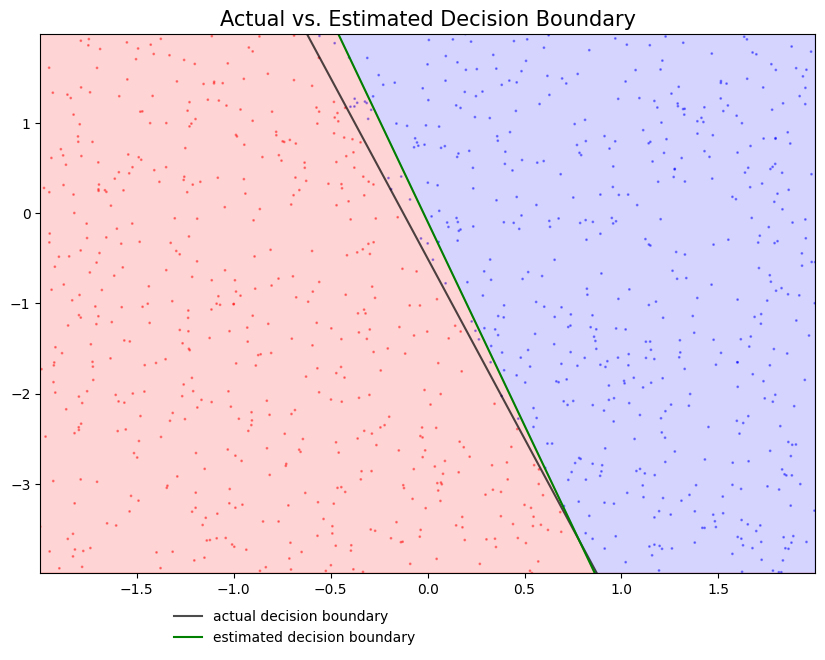

In [18]:
plt.figure(figsize = (10,7))

domain = np.linspace(-2,2)

plt.scatter(x.T[0],x.T[1], s = 1, color = ["red" if s == -1 else "blue" for s in y], alpha = .4)

plt.ylim(min(x.T[1]),max(x.T[1]))
plt.xlim(min(x.T[0]),max(x.T[0]))

actual_decision_line = -(beta_0 + (beta_1*domain))/beta_2
plt.plot(domain,actual_decision_line, color = 'black', label = "actual decision boundary", alpha = .7)

estim_decision_line = -(weights[0] + (weights[1]*domain))/weights[2]

plt.plot(domain,estim_decision_line, color = 'green', label = "estimated decision boundary")
plt.fill_between(domain, min(x.T[1]), estim_decision_line, color = 'red', alpha = .17)
plt.fill_between(domain, max(x.T[1]), estim_decision_line, color = 'blue', alpha = .17)

plt.legend(loc = "right", framealpha = 0, bbox_to_anchor = (.5,-.1))

plt.title("Actual vs. Estimated Decision Boundary", fontsize = 15)
plt.show()

